In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import FunctionTransformer

# Data loading and cleaning

In [60]:
df=pd.read_csv('Churn_Modelling.csv')
df

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0          2       0.00              1          1               1   
1          1   83807.86              1          0               1   
2          8  159660.80              3          1               0   
3          1       0.00              2          0               0   
4          2  125510.82              1          1               1   
...      ...        ...            ...        ...             ...   
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
0           101348.88       1  
1           112542.58       0  
2           113931.57       1  
3            93826.63       0  
4            79084.10       0  
...               ...     ...  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0  

[10000 rows x 14 columns]

## Firstly I will check general info about the dataframe like shape, columns, datatypes and missing values

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

# Dropping unnecessary columns

In [61]:
df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

# EDA

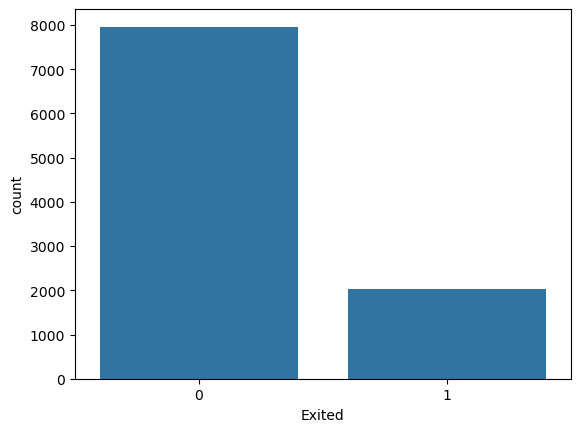

In [7]:
# check the distribution of the target variable
sns.countplot(x='Exited',data=df)
plt.show()

In [8]:
len(df[df['Exited']==1])/len(df[df['Exited']==0])

0.25580811252040686

## Categorical Columns

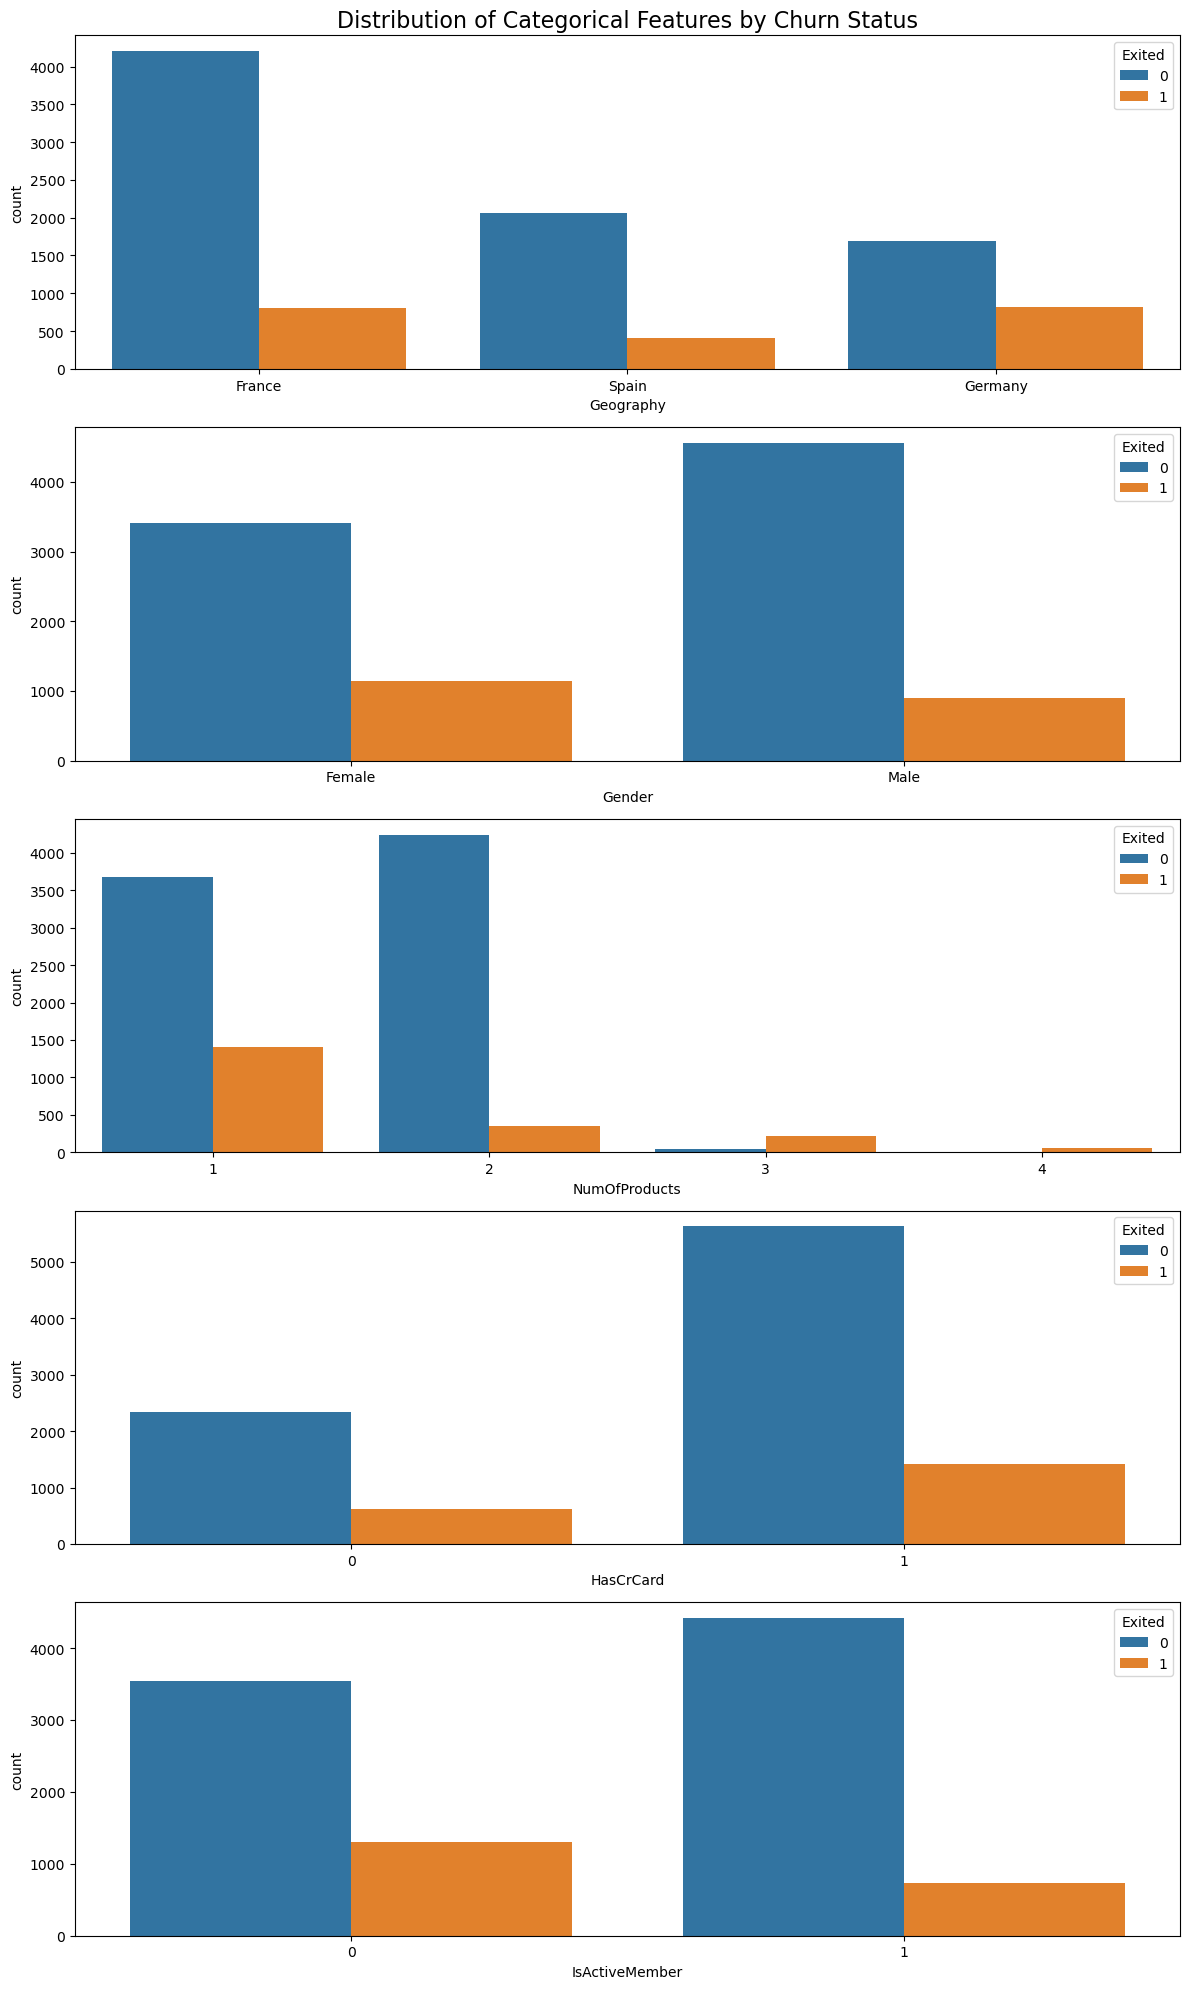

In [5]:
cat_cols=[col for col in df.columns if df[col].dtype=='object']+['NumOfProducts', 'HasCrCard', 'IsActiveMember']

fig,ax=plt.subplots(nrows=5, ncols=1, figsize=(12,20))
ax=ax.flatten()
ax[0].set_title('Distribution of Categorical Features by Churn Status', fontsize=16)
for col in cat_cols:
    sns.countplot(x=col,hue='Exited',data=df,ax=ax[cat_cols.index(col)])
plt.tight_layout()
plt.show()


# Numeric Columns

In [6]:
num_cols=[col for col in df.columns if col not in cat_cols and col!='Exited']

In [11]:
df[num_cols].describe()

CreditScore           Age        Tenure        Balance  \
count  10000.000000  10000.000000  10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288   
std       96.653299     10.487806      2.892174   62397.405202   
min      350.000000     18.000000      0.000000       0.000000   
25%      584.000000     32.000000      3.000000       0.000000   
50%      652.000000     37.000000      5.000000   97198.540000   
75%      718.000000     44.000000      7.000000  127644.240000   
max      850.000000     92.000000     10.000000  250898.090000   

       EstimatedSalary  
count     10000.000000  
mean     100090.239881  
std       57510.492818  
min          11.580000  
25%       51002.110000  
50%      100193.915000  
75%      149388.247500  
max      199992.480000

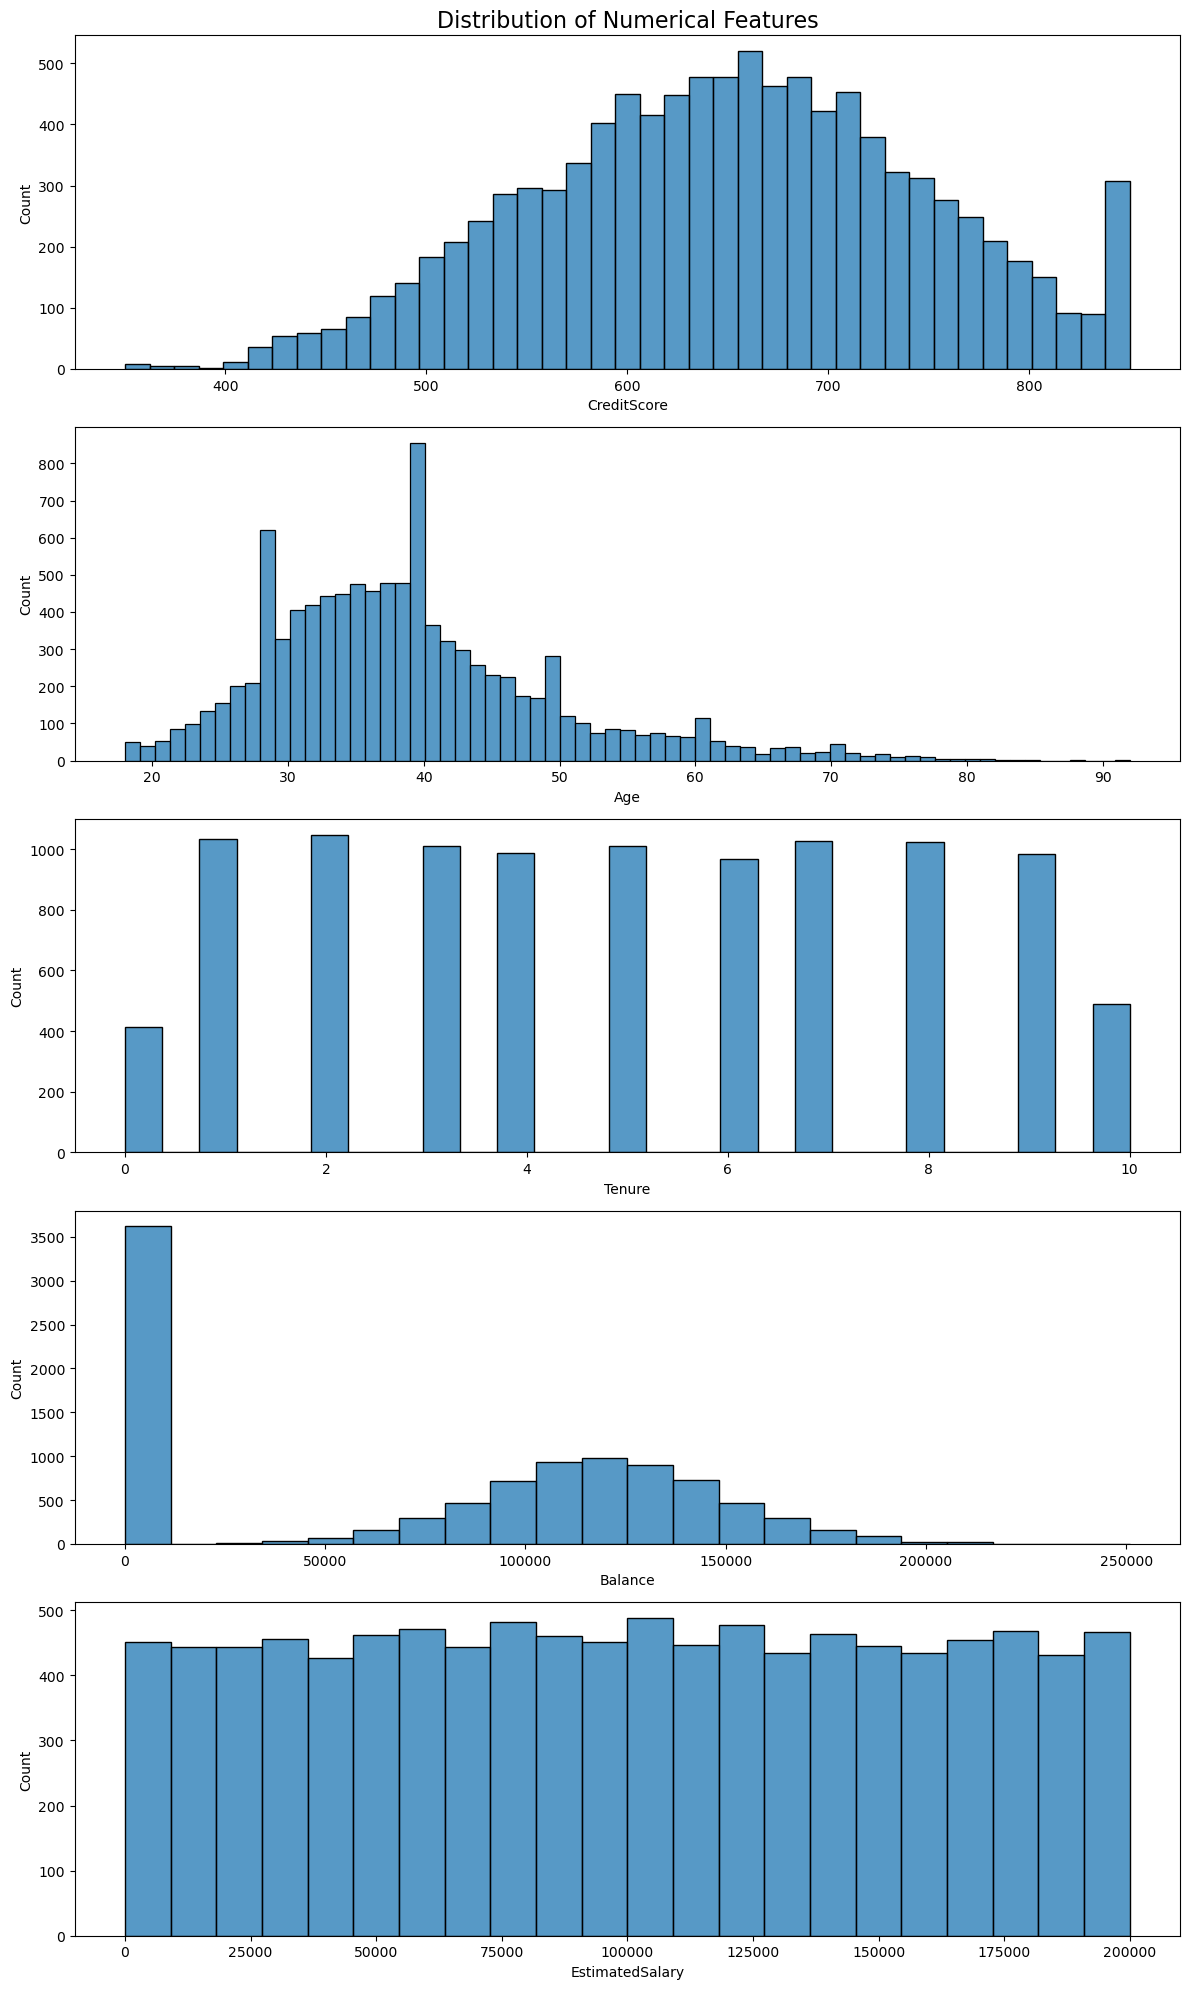

In [12]:
fig,ax=plt.subplots(nrows=5, ncols=1, figsize=(12,20))
ax=ax.flatten()
ax[0].set_title('Distribution of Numerical Features', fontsize=16)
for col in num_cols:
    sns.histplot(x=col,data=df,ax=ax[num_cols.index(col)])
plt.tight_layout()
plt.show()

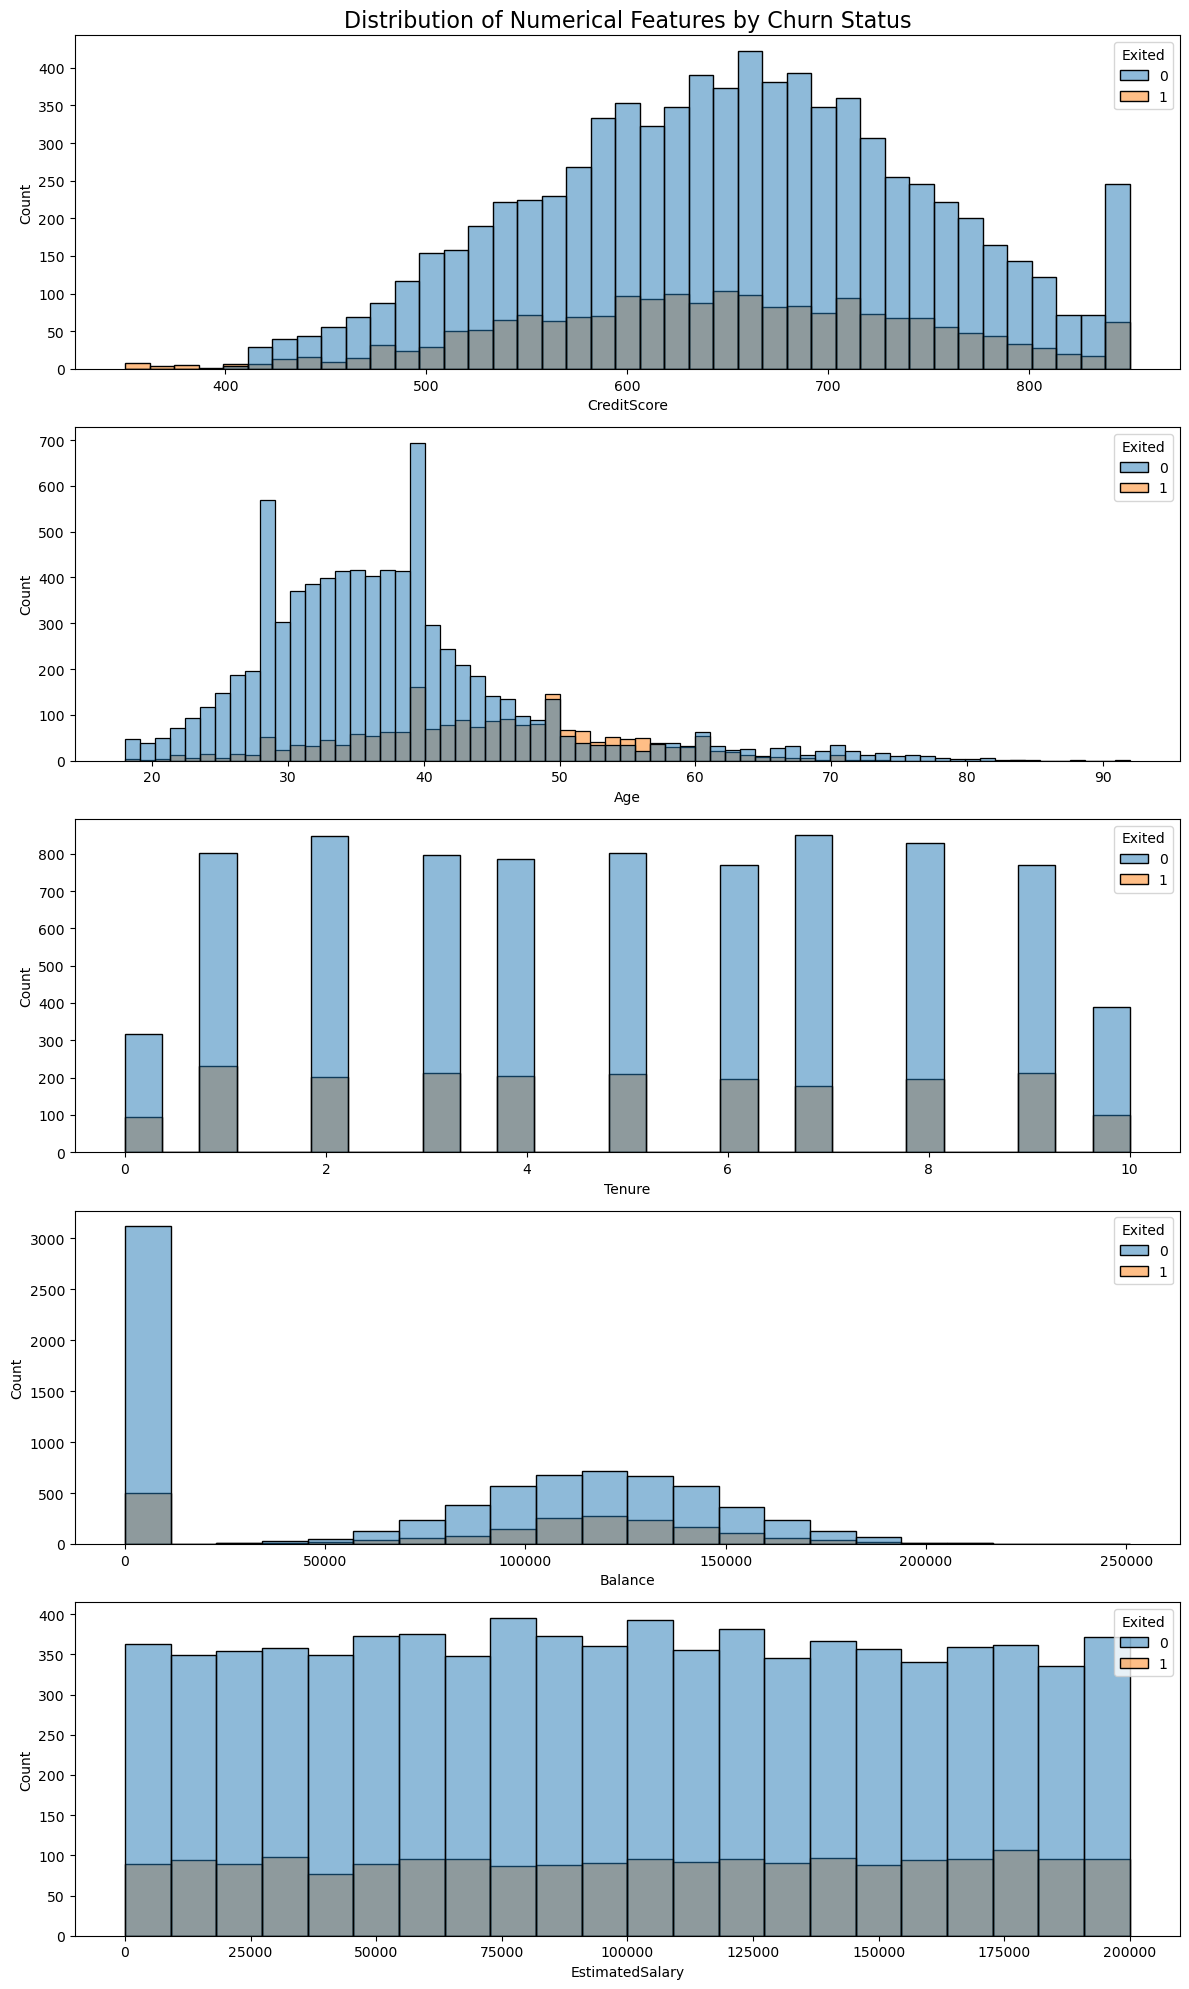

In [13]:
fig,ax=plt.subplots(nrows=5, ncols=1, figsize=(12,20))
ax=ax.flatten()
ax[0].set_title('Distribution of Numerical Features by Churn Status', fontsize=16)
for col in num_cols:
    sns.histplot(x=col,data=df, hue='Exited',ax=ax[num_cols.index(col)])
plt.tight_layout()
plt.show()

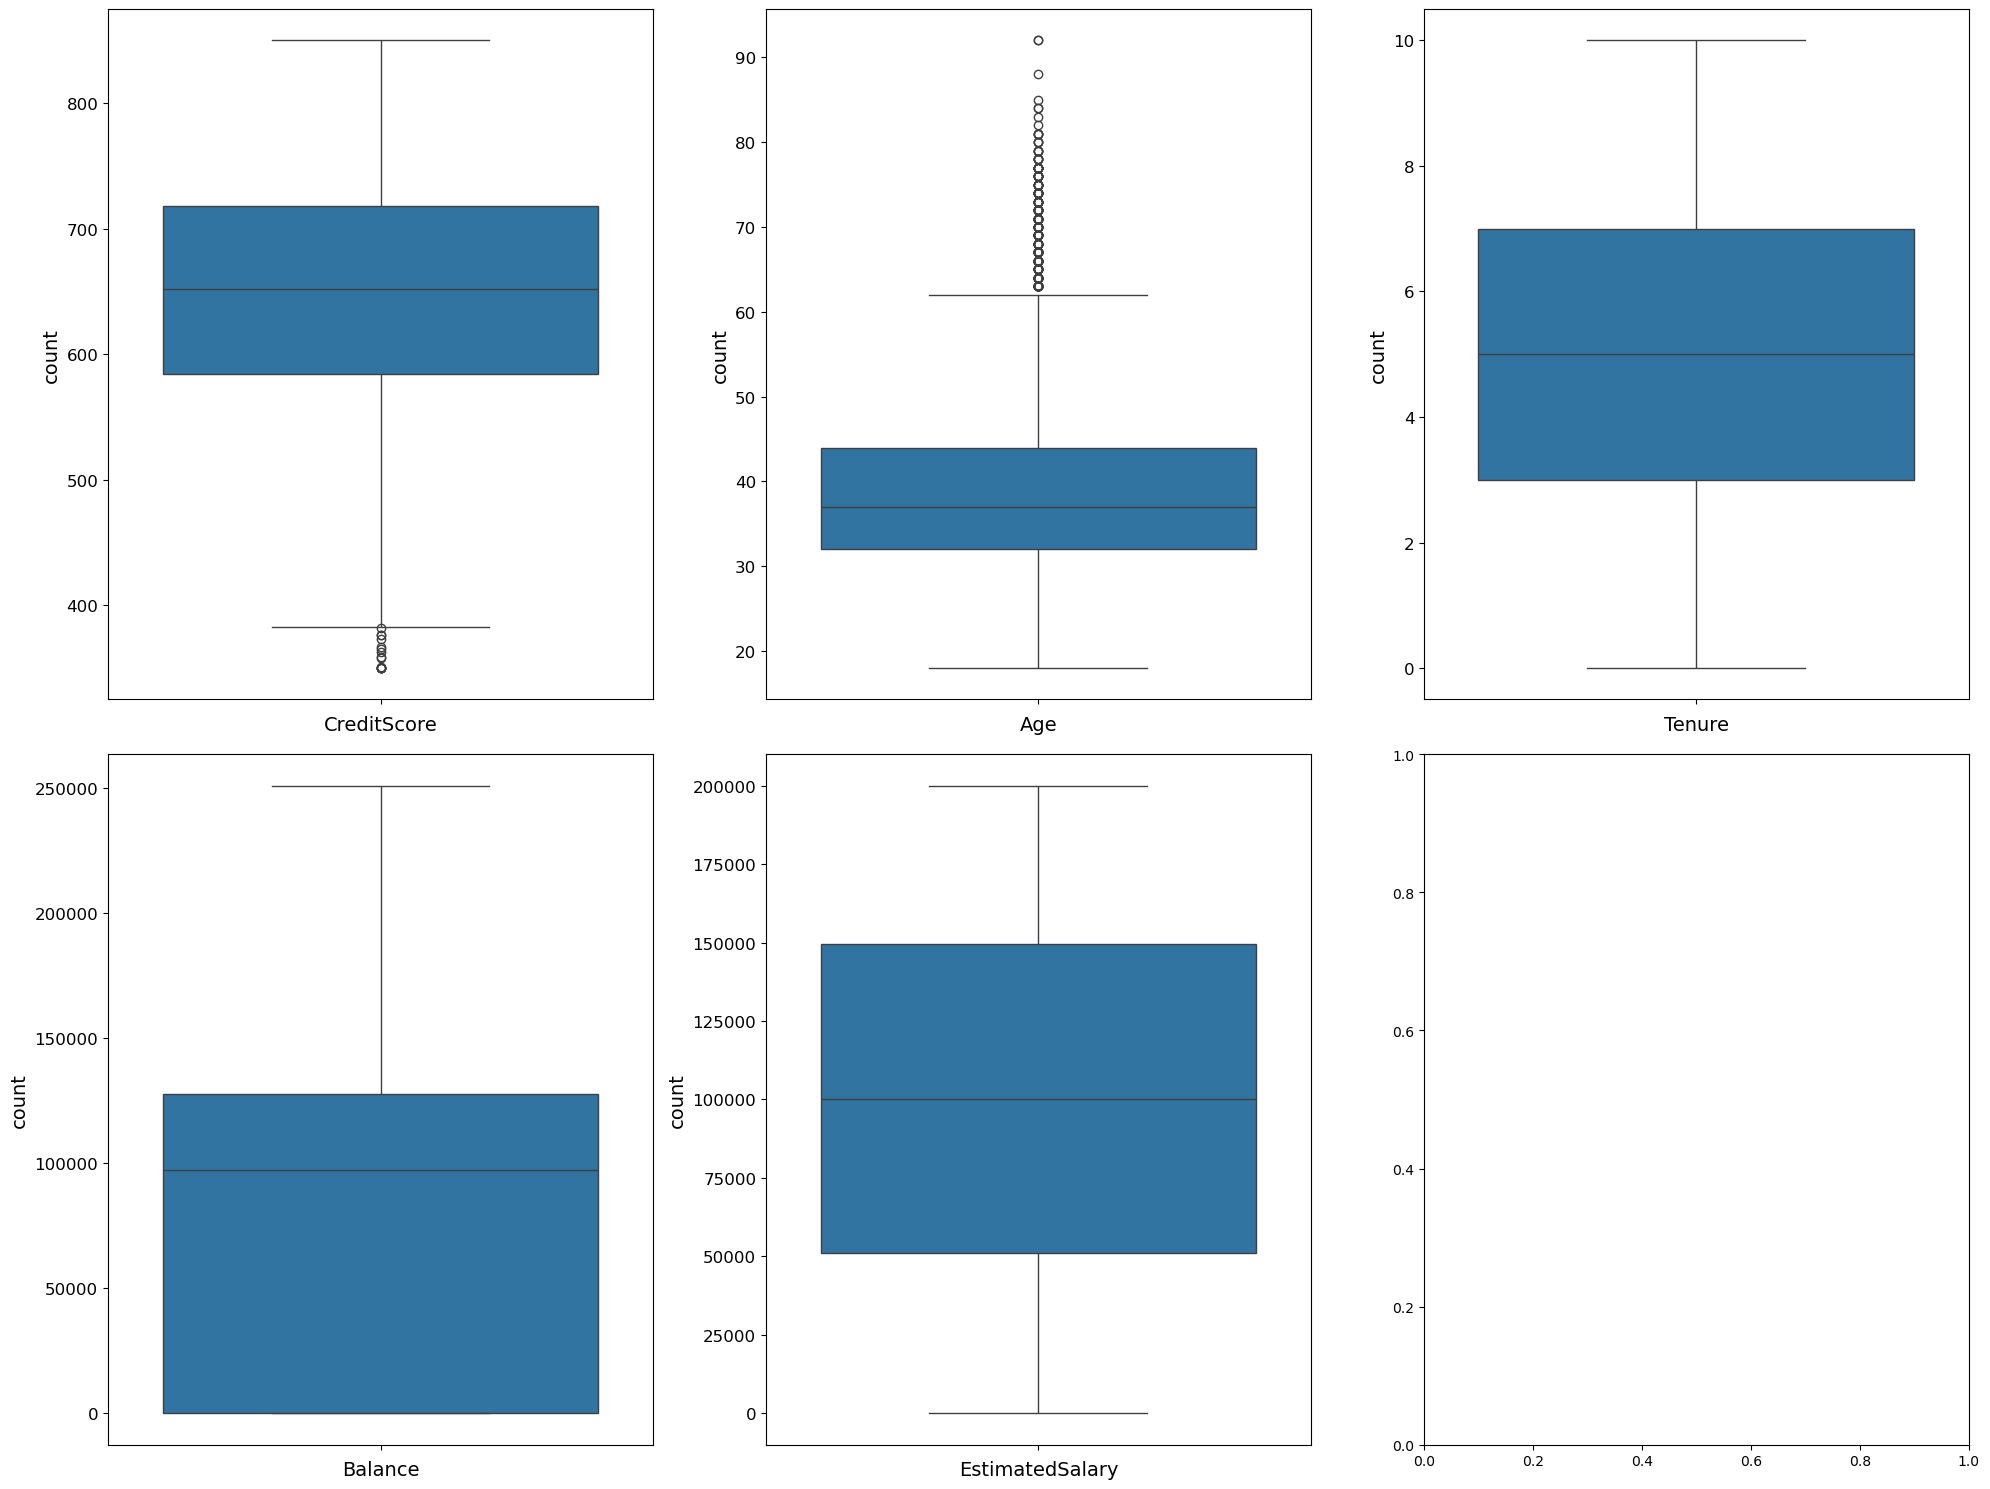

In [14]:
fig,ax=plt.subplots(nrows=2, ncols=3, figsize=(20,15))
ax=ax.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=df,y=col,ax=ax[i])
    ax[i].tick_params(axis='x', labelsize=14, rotation=45)
    ax[i].tick_params(axis='y', labelsize=12)
    ax[i].set_xlabel(col, fontsize=14)
    ax[i].set_ylabel('count', fontsize=14)

plt.tight_layout()
plt.show()

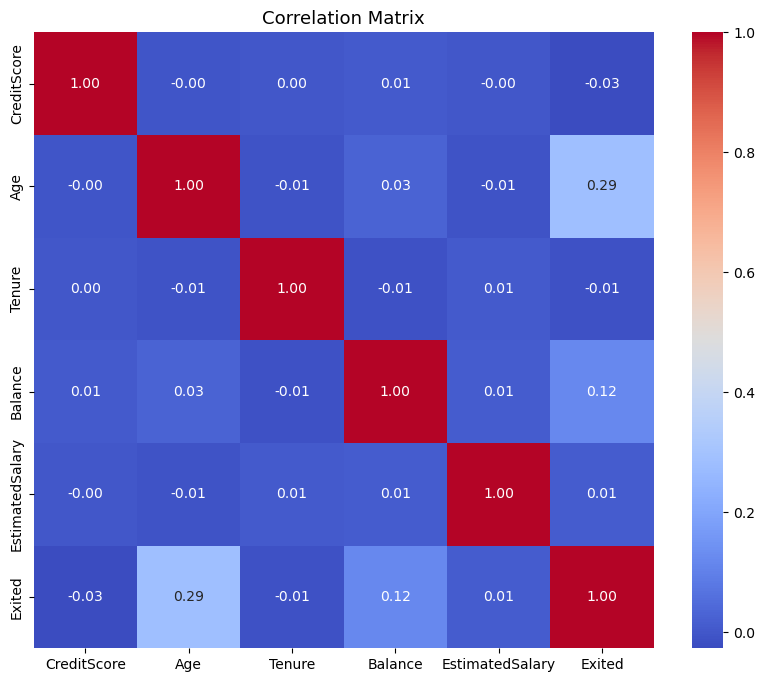

In [15]:
df_corr=df[num_cols+['Exited']]

corr=df_corr.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix', fontsize=13)
plt.show()

# Cutting numeric features into bins for better model performance

In [55]:
def feature_engineering(df):
    df=df.copy()
    df['CreditScoreClass']=pd.cut(df['CreditScore'], bins=[350, 420, 600, 725, np.inf], labels=['Low', 'Medium', 'High', 'Very High'])
    df['AgeGroup']=pd.cut(df['Age'], bins=[18, 30, 45, 60, np.inf], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
    df['TenureGroup']=pd.cut(df['Tenure'], bins=[0, 4, 8,  np.inf], labels=['New', 'Established', 'Loyal'])
    df['BalanceGroup']=pd.cut(df['Balance'], bins=[-1, 0, 50000, 100000, np.inf], labels=['No Balance', 'Low Balance', 'Medium Balance', 'High Balance'])
    df['EstimatedSalaryGroup']=pd.cut(df['EstimatedSalary'], bins=[0, 50000, 100000, np.inf], labels=['Low Salary', 'Medium Salary', 'High Salary'])
    return df
df=feature_engineering(df)
print(feature_engineering(df).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   CreditScore           10000 non-null  int64   
 1   Geography             10000 non-null  object  
 2   Gender                10000 non-null  object  
 3   Age                   10000 non-null  int64   
 4   Tenure                10000 non-null  int64   
 5   Balance               10000 non-null  float64 
 6   NumOfProducts         10000 non-null  int64   
 7   HasCrCard             10000 non-null  int64   
 8   IsActiveMember        10000 non-null  int64   
 9   EstimatedSalary       10000 non-null  float64 
 10  Exited                10000 non-null  int64   
 11  CreditScoreClass      9995 non-null   category
 12  AgeGroup              9978 non-null   category
 13  TenureGroup           9587 non-null   category
 14  BalanceGroup          10000 non-null  category
 15  Est

# Analysis of new variables

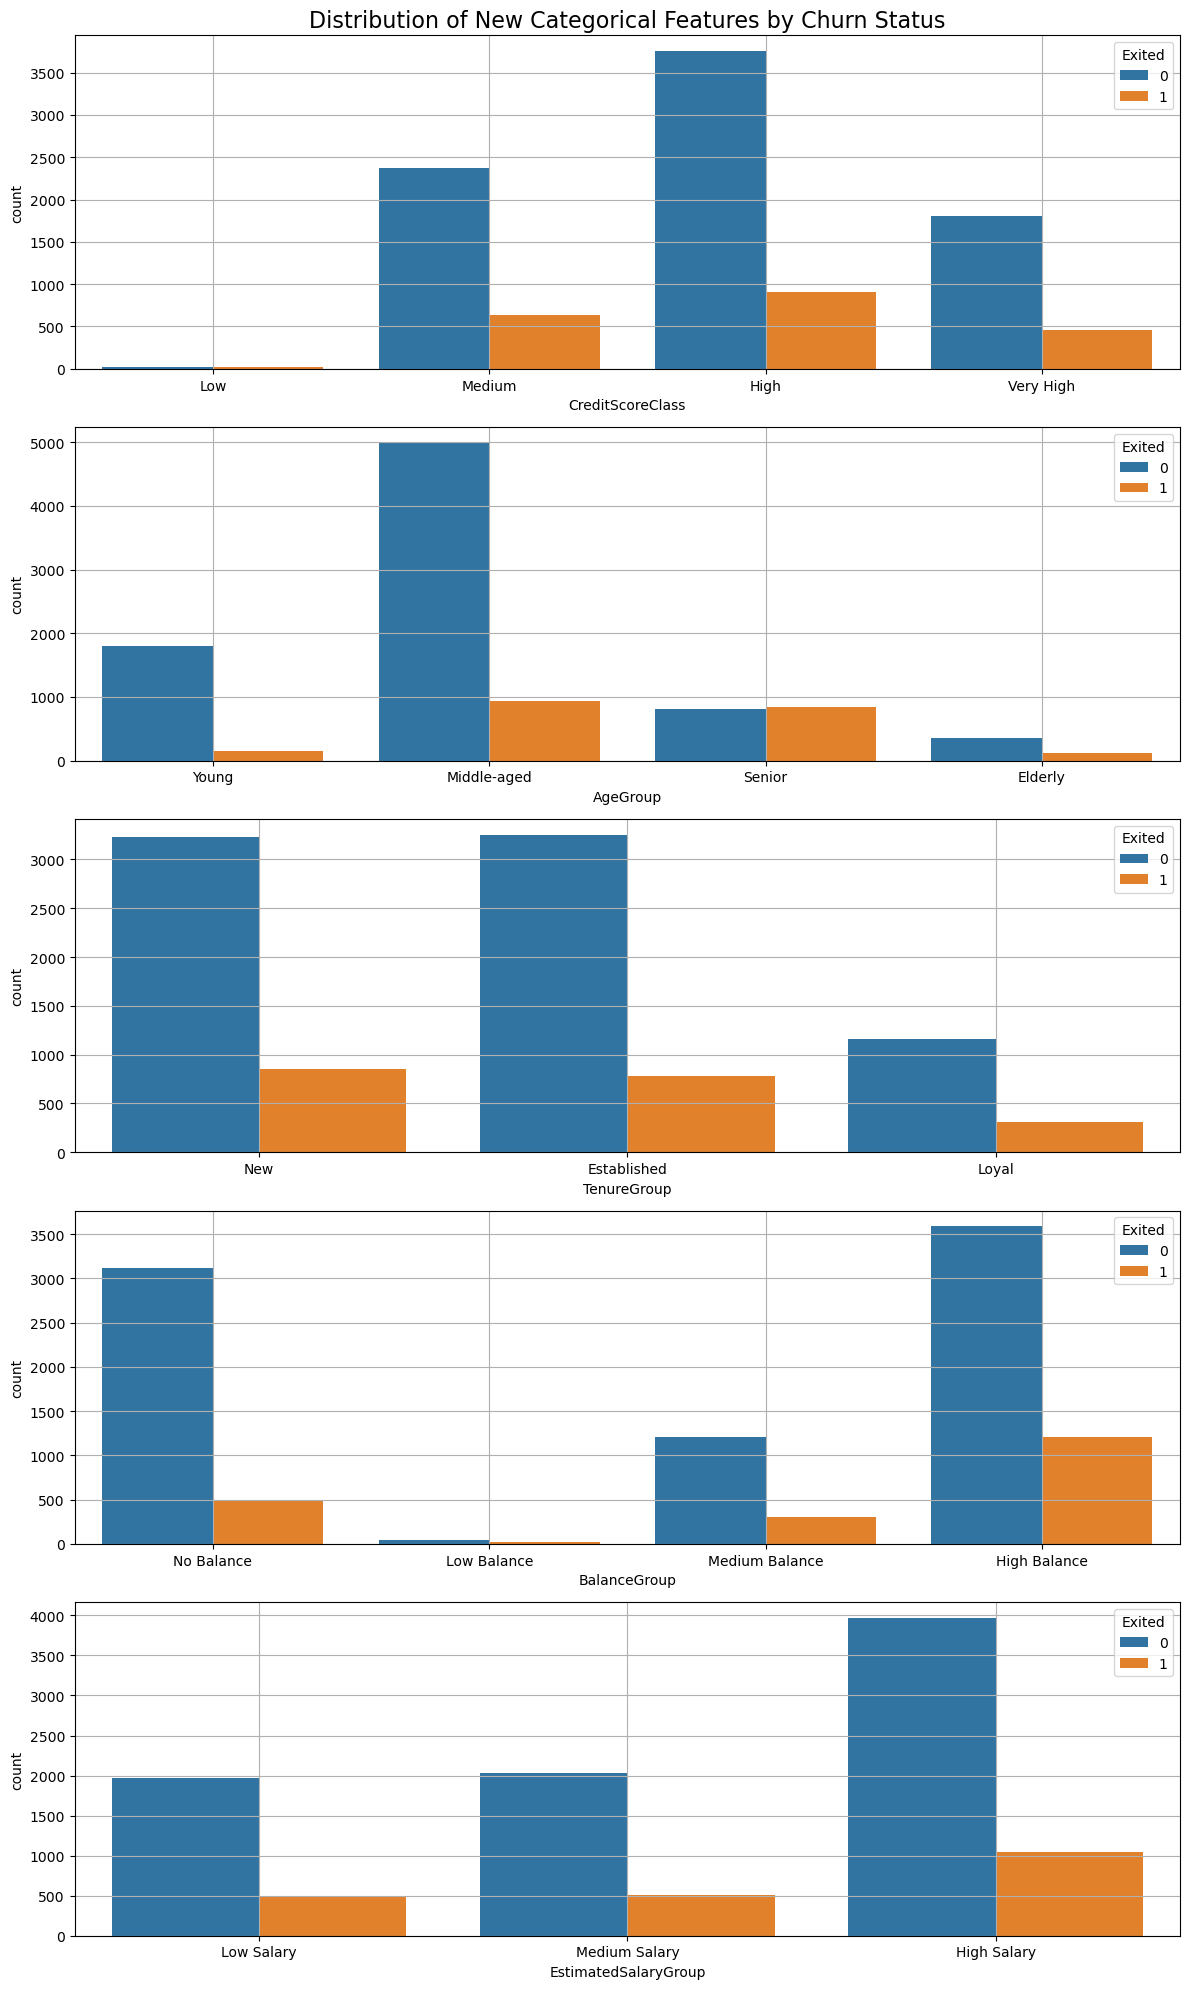

In [8]:
new_cols=['CreditScoreClass', 'AgeGroup', 'TenureGroup', 'BalanceGroup', 'EstimatedSalaryGroup']
fig,ax=plt.subplots(nrows=5, ncols=1, figsize=(12,20))
ax=ax.flatten()
ax[0].set_title('Distribution of New Categorical Features by Churn Status', fontsize=16)

for col in new_cols:
    sns.countplot(x=col,hue='Exited',data=df,ax=ax[new_cols.index(col)])
    ax[new_cols.index(col)].grid()
plt.tight_layout()
plt.show()

In [56]:
cat_cols=cat_cols+new_cols


# MODEL DEV

I divided the model development into two stages. In the first stage, I selected the model, the evaluation metric, and the method for encoding categorical features based on the best performance achieved with default settings. In the second stage, I used Optuna for hyperparameter tuning, and the model was evaluated using the metric chosen in the previous step based on GridSearch results.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer, PowerTransformer, OneHotEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, fbeta_score, f1_score, recall_score, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from category_encoders import TargetEncoder
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import lightgbm as lgb
import optuna

In [ ]:
encoders={
    'onehot': OneHotEncoder(handle_unknown='ignore', sparse_output=False),
    'target': TargetEncoder()
}

models={
    'RandomForest': RandomForestClassifier(random_state=42, class_weight={0:1, 1:3.9}, n_jobs=-1),
    'XGBoost': XGBClassifier(random_state=42, scale_pos_weight=3.9),
    'CatBoost': CatBoostClassifier(random_state=42, scale_pos_weight=3.9),
    'LightGBM': lgb.LGBMClassifier(random_state=42, scale_pos_weight=3.9)
}

metrics={
    'f1_score': make_scorer(f1_score),
    'recall_score': make_scorer(recall_score),
    'fbeta_5_score': make_scorer(fbeta_score, beta=5),
    'fbeta_6_score': make_scorer(fbeta_score, beta=6),
    'fbeta_7_score': make_scorer(fbeta_score, beta=7)
}

res={}

for encoder_name, encoder in encoders.items():
    preprocessor=ColumnTransformer(transformers=[
        ('cat', encoder, cat_cols)
    ])
    for name, model in models.items():
        for metric_name, metric in metrics.items():
            X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited',axis=1), df['Exited'], test_size=0.2, random_state=42, stratify=df['Exited'])
            X_train=preprocessor.fit_transform(X_train, y_train)
            cv_score=cross_val_score(model, X_train, y_train, cv=5, scoring=metric)
            res[(name, metric_name, encoder_name)] = cv_score.mean()

Learning rate set to 0.02276
0:	learn: 0.6817654	total: 3.43ms	remaining: 3.43s
1:	learn: 0.6734452	total: 5.71ms	remaining: 2.85s
2:	learn: 0.6638609	total: 8.1ms	remaining: 2.69s
3:	learn: 0.6557124	total: 11.1ms	remaining: 2.75s
4:	learn: 0.6489386	total: 13.2ms	remaining: 2.62s
5:	learn: 0.6398271	total: 15.9ms	remaining: 2.63s
6:	learn: 0.6348277	total: 17.8ms	remaining: 2.53s
7:	learn: 0.6265683	total: 20.3ms	remaining: 2.51s
8:	learn: 0.6211499	total: 23ms	remaining: 2.53s
9:	learn: 0.6150388	total: 25.5ms	remaining: 2.52s
10:	learn: 0.6090814	total: 27.9ms	remaining: 2.51s
11:	learn: 0.6029124	total: 30.8ms	remaining: 2.53s
12:	learn: 0.5972143	total: 33.2ms	remaining: 2.52s
13:	learn: 0.5913962	total: 35.7ms	remaining: 2.52s
14:	learn: 0.5863429	total: 38.2ms	remaining: 2.51s
15:	learn: 0.5820757	total: 40.6ms	remaining: 2.5s
16:	learn: 0.5772257	total: 43.2ms	remaining: 2.5s
17:	learn: 0.5725733	total: 45.7ms	remaining: 2.49s
18:	learn: 0.5673567	total: 48.2ms	remaining: 2.49

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.w

[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 32
[LightGBM] [Info] [binary:Bo

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 32
[LightGBM] [Info] [binary:Bo

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 32
[LightGBM] [Info] [binary:Bo

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000190 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 64
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 32
[LightGBM] [Info] [binary:Bo

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Learning rate set to 0.02276
0:	learn: 0.6824402	total: 2.07ms	remaining: 2.07s
1:	learn: 0.6726477	total: 4ms	remaining: 2s
2:	learn: 0.6635455	total: 6.08ms	remaining: 2.02s
3:	learn: 0.6531616	total: 8.29ms	remaining: 2.06s
4:	learn: 0.6442471	total: 10.2ms	remaining: 2.03s
5:	learn: 0.6358509	total: 12.2ms	remaining: 2.01s
6:	learn: 0.6273828	total: 14ms	remaining: 1.99s
7:	learn: 0.6203143	total: 16ms	remaining: 1.98s
8:	learn: 0.6131674	total: 17.9ms	remaining: 1.97s
9:	learn: 0.6060799	total: 20ms	remaining: 1.98s
10:	learn: 0.6004919	total: 22ms	remaining: 1.98s
11:	learn: 0.5936543	total: 23.9ms	remaining: 1.97s
12:	learn: 0.5881511	total: 26ms	remaining: 1.98s
13:	learn: 0.5844482	total: 28ms	remaining: 1.97s
14:	learn: 0.5799904	total: 29.9ms	remaining: 1.96s
15:	learn: 0.5754798	total: 31.9ms	remaining: 1.96s
16:	learn: 0.5707387	total: 34ms	remaining: 1.97s
17:	learn: 0.5674480	total: 36.1ms	remaining: 1.97s
18:	learn: 0.5627160	total: 38.2ms	remaining: 1.97s
19:	learn: 0.

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.w

[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 10
[LightGBM] [Info] [binary:Bo

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.w

[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000102 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000094 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 10
[LightGBM] [Info] [binary:Bo

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000092 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 10
[LightGBM] [Info] [binary:Bo

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.w

[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000091 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.203750 -> initscore=-1.363019
[LightGBM] [Info] Start training from score -1.363019
[LightGBM] [Info] Number of positive: 1304, number of negative: 5096
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000101 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 42
[LightGBM] [Info] Number of data points in the train set: 6400, number of used features: 10
[LightGBM] [Info] [binary:Bo

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.w

In [47]:
sorted(res.items(), key=lambda x: x[1], reverse=True)

[(('LightGBM', 'recall_score', 'onehot'), 0.7098159509202453),
 (('LightGBM', 'fbeta_7_score', 'onehot'), 0.703790115929027),
 (('LightGBM', 'fbeta_6_score', 'onehot'), 0.7016982124057147),
 (('CatBoost', 'recall_score', 'onehot'), 0.6993865030674847),
 (('LightGBM', 'fbeta_5_score', 'onehot'), 0.6983218327472583),
 (('CatBoost', 'fbeta_7_score', 'onehot'), 0.6939378450474482),
 (('CatBoost', 'fbeta_6_score', 'onehot'), 0.6920442422496031),
 (('LightGBM', 'recall_score', 'target'), 0.6920245398773006),
 (('CatBoost', 'fbeta_5_score', 'onehot'), 0.6889856779756706),
 (('LightGBM', 'fbeta_7_score', 'target'), 0.6865166062629158),
 (('CatBoost', 'recall_score', 'target'), 0.6846625766871165),
 (('LightGBM', 'fbeta_6_score', 'target'), 0.6846027415726851),
 (('LightGBM', 'fbeta_5_score', 'target'), 0.6815118202924507),
 (('CatBoost', 'fbeta_7_score', 'target'), 0.6795936069690838),
 (('CatBoost', 'fbeta_6_score', 'target'), 0.6778309619482781),
 (('CatBoost', 'fbeta_5_score', 'target'), 0.

As we can see, the best-performing model was LightGBM using the recall metric and OneHot Encoding. The second-best model was also LightGBM with OneHot Encoding, evaluated using recall with beta = 7. Therefore, I performed hyperparameter tuning on both models, optimizing the selected metrics.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Exited',axis=1), df['Exited'], test_size=0.2, random_state=42, stratify=df['Exited'])

In [ ]:
fe=FunctionTransformer(feature_engineering)

cat_process=Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

num_process=Pipeline(steps=[
    ('scaler', PowerTransformer())
])

preprocessor=ColumnTransformer(transformers=[
    ('cat', cat_process, cat_cols), 
    ('num', num_process, num_cols) 
])

def objective(trial):
    params={
        "objective": "binary",
        "boosting_type": "gbdt",
        "scale_pos_weight": 3.9,
        "verbosity": -1,
        'num_leaves': trial.suggest_int('num_leaves', 16, 350),
        'max_depth': trial.suggest_int('max_depth', 3, 16),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
        'num_boost_round': trial.suggest_int('num_boost_round', 100, 1000, log=True),
        "min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 30, 100),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.3, 0.95),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.3, 0.95),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-6, 0.1, log=True),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-6, 0.1, log=True),
        "random_state": 42
    }
    model=lgb.LGBMClassifier(**params)
    pipeline=Pipeline(steps=[
        ('feature_engineering', fe),
        ('preprocessor', preprocessor),
        ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred=pipeline.predict(X_test)
    score=  recall_score(y_test, y_pred)
    return score
study=optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=120)
print(f'Best trial: {study.best_trial.params}')
print(f'Best score: {study.best_trial.value}')

[I 2026-02-01 13:56:39,456] A new study created in memory with name: no-name-c3c649d5-d9e2-4cf7-bf5d-3d53b24f305c
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 13:56:40,076] Trial 0 finished with value: 0.6977886977886978 and parameters: {'num_leaves': 221, 'max_depth': 10, 'learning_rate': 0.02850899154766312, 'num_boost_round': 637, 'min_data_in_leaf': 76, 'feature_fraction': 0.4389910182645097, 'bagging_fraction': 0.634353374765563, 'bagging_freq': 5, 'lambda_l2': 0.003845791524592336, 'lambda_l1': 3.871075045790958e-06}. Best is trial 0 with value: 0.6977886977886978.
c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2026-02-01 13:56:40,320] Trial 1 finished with v

Best trial: {'num_leaves': 122, 'max_depth': 3, 'learning_rate': 0.04269175961488099, 'num_boost_round': 207, 'min_data_in_leaf': 40, 'feature_fraction': 0.8948028763283103, 'bagging_fraction': 0.9194273996092769, 'bagging_freq': 1, 'lambda_l2': 0.008647631772309105, 'lambda_l1': 0.06622190755111512}
Best score: 0.7764127764127764


## TRIALS:
Best trial: {'num_leaves': 216, 'max_depth': 3, 'learning_rate': 0.026651486106472815, 'num_boost_round': 343, 'min_data_in_leaf': 31, 'feature_fraction': 0.44986320323360535, 'bagging_fraction': 0.7326343382898357, 'bagging_freq': 2, 'lambda_l2': 0.04910513025563936, 'lambda_l1': 0.008018648951855945}

Best score (FBet = 5): 0.7715632800221873

             precision    recall  f1-score   support

           0       0.93      0.81      0.86      1593
           1       0.50      0.77      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.80      0.81      2000

Best trial: {'num_leaves': 122, 'max_depth': 3, 'learning_rate': 0.04269175961488099, 'num_boost_round': 207, 'min_data_in_leaf': 40, 'feature_fraction': 0.8948028763283103, 'bagging_fraction': 0.9194273996092769, 'bagging_freq': 1, 'lambda_l2': 0.008647631772309105, 'lambda_l1': 0.06622190755111512}

Best score (Recall): 0.7764127764127764

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.49      0.78      0.60       407

    accuracy                           0.79      2000
   macro avg       0.71      0.79      0.73      2000
weighted avg       0.84      0.79      0.81      2000


              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1593
           1       0.50      0.78      0.61       407

    accuracy                           0.80      2000
   macro avg       0.72      0.79      0.74      2000
weighted avg       0.85      0.80      0.81      2000



c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


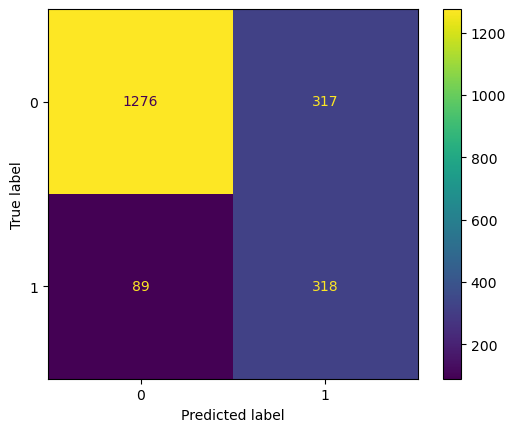

In [65]:
fe=FunctionTransformer(feature_engineering)
params={'num_leaves': 216, 'max_depth': 3, 'learning_rate': 0.026651486106472815, 'num_boost_round': 343, 'min_data_in_leaf': 31, 'feature_fraction': 0.44986320323360535, 'bagging_fraction': 0.7326343382898357, 'bagging_freq': 2, 'lambda_l2': 0.04910513025563936, 'lambda_l1': 0.008018648951855945,
        'random_state': 42, 'scale_pos_weight': 3.9, "objective": "binary", "boosting_type": "gbdt","verbosity": -1}
cat_process=Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

num_process=Pipeline(steps=[
    ('scaler', PowerTransformer())
])

preprocessor=ColumnTransformer(transformers=[
    ('cat', cat_process, cat_cols), 
    ('num', num_process, num_cols) 
])
model=lgb.LGBMClassifier(**params)
pipeline=Pipeline(steps=[
    ('feature_engineering', fe),
    ('preprocessor', preprocessor),
    ('model', model)
])

pipeline.fit(X_train, y_train)
y_pred=pipeline.predict(X_test)
print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [66]:
import cloudpickle

with open('Churn_model.pkl', 'wb') as f:
    cloudpickle.dump(model, f)

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


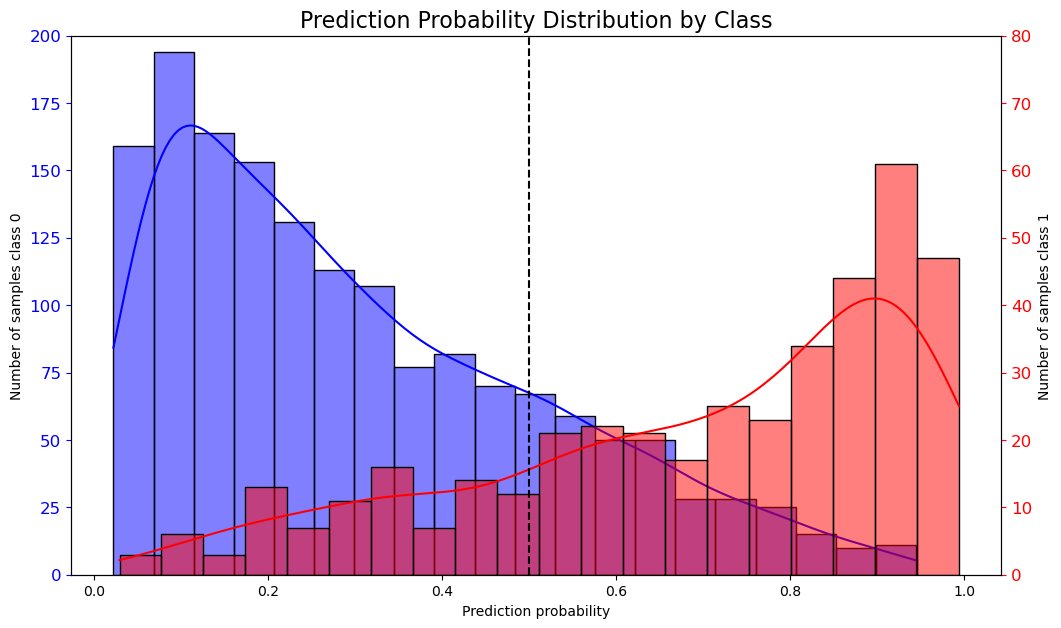

In [28]:
y_pred=pipeline.predict_proba(X_test)[:,1]
df_shap = pd.DataFrame({
    'pred_prob': y_pred,
    'label': y_test
})
df_0=df_shap[df_shap['label'] == 0]
df_1=df_shap[df_shap['label'] == 1]

fig,ax=plt.subplots(figsize=(12,7))
sns.histplot(data=df_0, x='pred_prob', bins=20, kde=True, color='blue', alpha=0.5,ax=ax)
ax2= ax.twinx()
sns.histplot(data=df_1, x='pred_prob', bins=20, kde=True, color='red', alpha=0.5,ax=ax2)
ax.set_xlabel("Prediction probability")
ax.set_ylabel("Number of samples class 0")
ax.set_ylim(0,200)
ax.tick_params(axis='y', labelsize=12, colors='blue')
ax2.set_ylabel("Number of samples class 1")
ax2.set_ylim(0,80)
ax2.tick_params(axis='y', labelsize=12, colors='red')
plt.vlines(x=0.5, ymin=0, ymax=1000, color='black', linestyle='--')

plt.title("Prediction Probability Distribution by Class", fontsize=16)
plt.show()

# Feature Importance

In [29]:
import shap

c:\Users\kamil\anaconda3\envs\A1\Lib\site-packages\shap\explainers\_tree.py:583: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


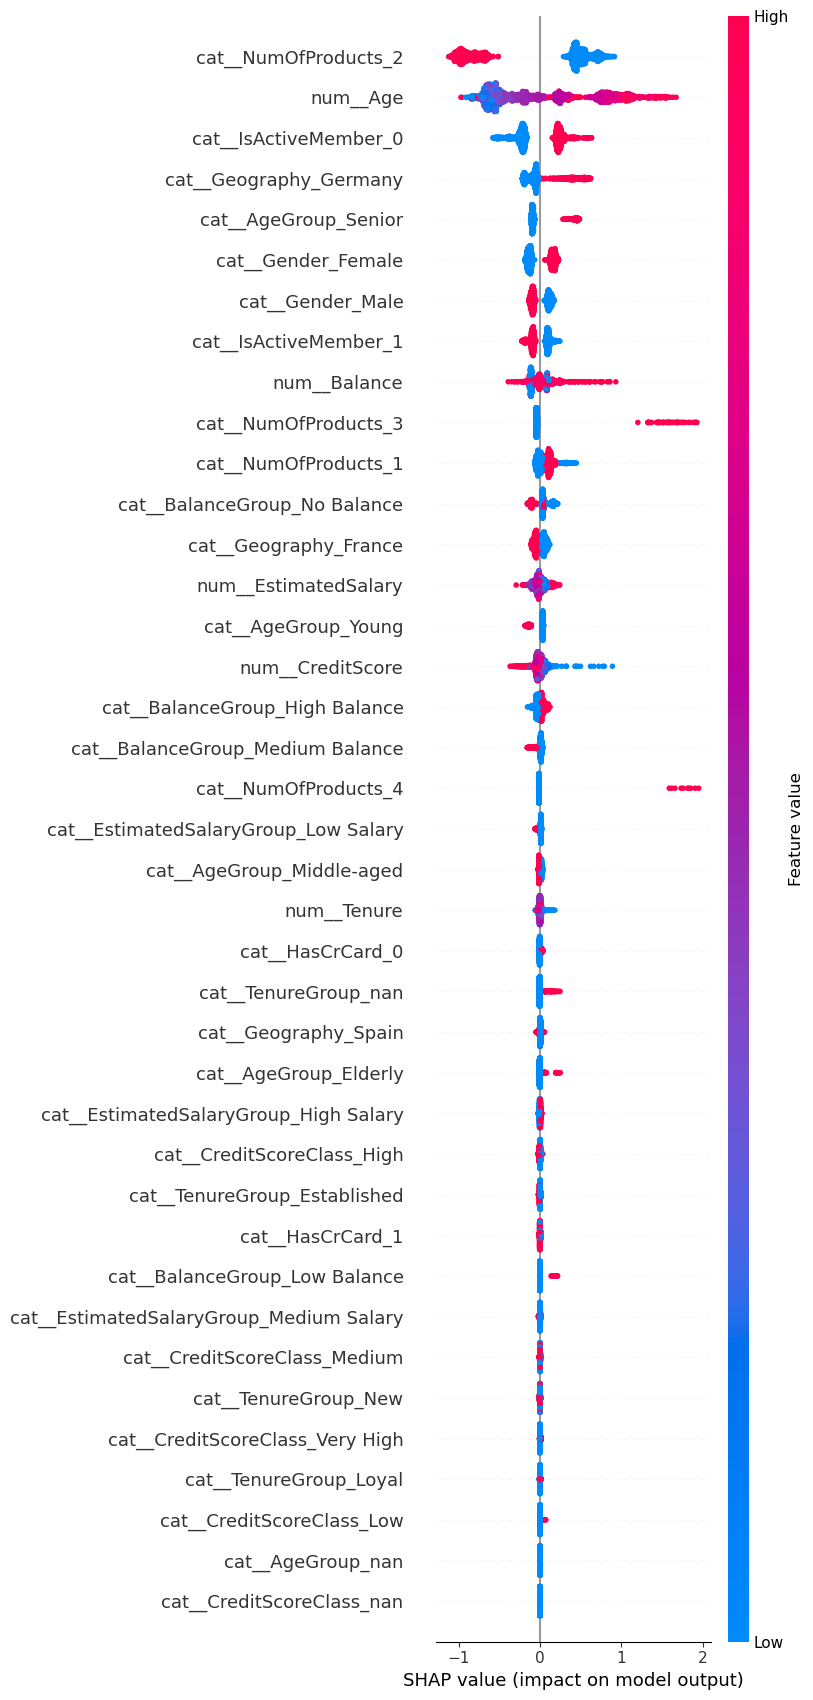

In [30]:
lgbm=pipeline.named_steps['model']
X_processed = pipeline.named_steps['preprocessor'].transform(X_test)
feature_names = pipeline.named_steps['preprocessor'].get_feature_names_out()
explainer = shap.TreeExplainer(lgbm)
shap_values = explainer.shap_values(X_processed)
shap.summary_plot(shap_values, X_processed, feature_names=feature_names, max_display=len(feature_names))

The model assigns higher importance to categorical features than to numerical ones, with age being the only exception. This may be due to the fact that most numerical variables follow normal distributions. After converting them into categories, they seem to carry more meaningful information for the model’s decision-making process.